## **<ins><center>EPHEMERIS/ATTITUDE TUTORIAL</center></ins>**

This notebook provides a basic overview and information on how to use the CAS_ORBIT*.sp3, CAS_ephemeris*.txt and CAS_Att_Quat*.cdf files to create various plots 

### <ins>Table of Contents</ins>

* [About CASSIOPE](#about-cassiope)
* [Prerequisites](#prerequisites)
* [How the files are stored](#how-the-files-are-stored)
    * [CASSIOPE Orbit Geo SP3 files](#cas_orbit_geo-sp3-files)
    * [CASSIOPE Ephemeris Text files](#cas_ephemeris-txt-files)
    * [CASSIOPE Attitude Quaternion cdf file](#cas_att_quat-cdf-files)
* [Tutorials](#tutorials)
    1. [Working with CASSIOPE Orbit Geo files](#working-with-cassiope-orbit-geo-files)
    2. [Working with CASSIOPE Ephemeris text files](#working-with-cassiope-ephemeris-text-files)
        * [Plotting Latitude, Longitude, Altitude as functions of time](#plotting-latitude-longitude-altitude-as-functions-of-time)
        * [Plotting YPR as function of time](#plotting-ypr-as-function-of-time)
    3. [Working with CASSIOPE Attitude-Quaternion cdf file](#working-with-cassiope-attitude-quaternion-cdf-file)
        * [Plotting Quaternions as a function of time](#plotting-quaternions-as-a-function-of-time)
        * [Plotting Yaw, Pitch, Roll as function of time ](#plotting-yaw-pitch-roll-as-function-of-time)

<a id="about-cassiope"></a>

### <ins>About Cassiope</ins>

CASSIOPE was launched into an elliptic, polar orbit at 81o inclination, with an apogee of 1500 km and a perigee of 325 km. The orbital plane precesses in local time at close to two degrees per day, while the argument of perigee precesses at roughly three degrees per day. Periodic two-line-element ephemeris data is insufficient for accurate position information in low-earth orbit, so we provide GPS-derived position information in the file types noted below. In addition, CASSIOPE is equipped with two star trackers, two magnetometers, and six coarse sun sensors for attitude determination - of which only the star trackers are capable of providing science-grade attitude knowledge. It is therefore important for users to understand and utilize both the attitude data as well as the attitude data source, as noted below

<a id="prerequisites"></a>

### <ins>Prerequisites</ins>

1. This tutorial assumes you have some basic understanding of Python and its terminology.

2. You will be required to install the following libraries in your python environment:
    *  __[cdflib](https://pypi.org/project/cdflib/)__
    *  __[matplotlib](https://matplotlib.org/stable/users/installing/index.html)__
    *  __[numpy](https://numpy.org/install/)__
    *  __[pandas](https://pandas.pydata.org/docs/getting_started/install.html)__

<a id="how-the-files-are-stored"></a>

### <ins>How the files are stored</ins>

<a id="cas_orbit_geo-sp3-files"></a>

#### CAS_ORBIT_GEO sp3 files 

 The Orbit GEO SP3 text files are a daily product. These files contain CASSIOPE position and velocity data in the International Terrestrial Reference Frame (ITRF) geographic Cartesian coordinate system, formatted in the National Geodetic Survey (NGS) SP3 (Standard product # 3) format. The SP3 format standard is fully described in __[reference R4](https://epop.phys.ucalgary.ca/wp-content/uploads/2021/05/R4-The-National-Geodetic-Survey-Standard-Format-SP3.txt)__.

<a id="cas_ephemeris-txt-files"></a>

#### CAS_ephemeris txt files

The CAS_ephemeris files are a daily product that contains spacecraft position and attitude information. It is derived from the CAS_Orbit and CAS_AttQuat files, and contains the information below. Attitude data (yaw-pitch-roll angles) are relative to the +Z-to-nadir attitude. 

Data:
* Year Month Day (UTC)
* Hour Minute Second (UTC)
* J2000 XGEI (km)
* J2000 YGEI (km)
* J2000 ZGEI (km)
* J2000 VXGEI (km/s)
* J2000 VYGEI (km/s)
* J2000 VZGEI (km/s)
* XGSM (km)
* YGSM (km)
* ZGSM (km)
* Geographic latitude (deg)
* Geographic longitude (deg)
* Altitude (km)
* Magnetic latitude (deg)
* Magnetic longitude (deg)
* Magnetic local time (h)
* Spacecraft attitude yaw angle (degrees)
* Spacecraft attitude pitch angle (degrees)
* Spacecraft attitude roll angle (degrees)
* Attitude Accuracy (0 = Dropout, 1 = Rough, 2 = Coarse, 3 = Moderate,  4 = Fine)
The attitude accuracy is derived from the CAS_AttQuat CDF file using each second’s ‘Time-To-Previous’ ‘Time-To-Next’, ‘Data-Source-Previous’ and ‘Data-Source-Next’.

The following is the explanantion for *Attitude Accuracy* values:

* 0:	‘Dropout’ is a period lacking solutions of greater than ten minutes, which is overridden with NaN.
* 1:	‘Rough’ is when the interpolation is between two Star-Sensor Solutions, with a total Time-between-solutions greater than 120 seconds, or that splines into or out of a solution derived from the Coarse Sun Sensors (i.e. where no star tracker solution is available)
* 2:	‘Coarse’ is when the interpolation is between two Star-Sensor Solutions, with a total Time-between-solutions of between 30 and 120 seconds.
* 3:	‘Moderate’ is when the interpolation is between two Star-Sensor Solutions, with a total Time-between-solutions of between 10 and 30 seconds.
* 4:	‘Fine’ is when the interpolation is between two Star-Sensor Solutions, with a total Time-between-solutions of less than 10 seconds



<a id="cas_att_quat-cdf-files"></a>

#### CAS_Att_Quat cdf files
The attitude quaternion CDF file is CASSIOPE's daily definitive attitude file, formatted to the NASA Common Data (CDF) standard. 

Contents:
* Timestamp: CDF Epoch type. The output timestamps are on the second, every second, for the 86400s of the day. They start at 00:00:00, and end at 23:59:59. CDF_Epoch does not acknowledge leap seconds (it’s UTC-based and counts from 01-Jan-0000 00:00:00.000).
* q: Attitude Quaternion. Scalar Last. Uses the frame translation “ITRF<-Body”. It is a 2d Array of double-precision floats.
* Yaw: Yaw Degrees. 321 Derivation.
* Pitch: Pitch Degrees. 321 Derivation.
* Roll: Roll Degrees. 321 Derivation.
* Data_Source_Previous:	The source of the previous Definitive Solution.
* Data_Source_Next:	The source of the next Definitive Solution.
* Time_To_Previous:	Seconds until the next Definitive Solution.
* Time_To_Next:	Seconds until the previous Definitive Solution

The Data_Source fields are a critical parameter in determining the uncertainty of the reported attitude solution. The uncertainty in the star sensor measurements are on the order of 0.01 degrees when both star sensors are merged, and 0.06 degrees when there is data from only one star sensor. Coarse sun sensors coupled with magnetometers, on the other hand, have a much larger uncertainty in the range of 8 degrees on average, with a large variation in the results depending on local time, orbit plane orientation, and other factors.

With regards to “Time to Previous” and “Time to Next”, off-cadence solutions (‘definitive’) from the star sensors and coarse sun sensors are used to build the solution using a 1Hz splined output. Data_Source_Previous/Next indicates from what source the corresponding Time_To_Previous/Next off-cadence solution came from.

For example, if there’s a solution at 12:10:30.60 from Star-Tracker B:
12:10:30 will have a Time-To-Next of 0.6, and a Data_Source_Next of 5
12:10:31 will have a Time-To-Prior of 0.4, and a Data_Source_Previous of 5.

If there is a solution that is exactly on a second, it will be used for BOTH Time-To and Data-Source of that on-cadence second.
E.g.: If there’s a solution at 12:10:30.00 from Star-Tracker A, 12:10:30 will have a Time-To-Next of 0, a Time-To-Previous of 0, a Data_Source_Next of 4, and a Data_Source_Previous of 4.

Data Sources:
* 0:	Dropout (added to indicate the start/end of a ‘NaN’ filled period)
* 1:	Uncalibrated coarse sun sensor and magnetometer solution (very large uncertainty, > 10 degrees)
* 2:	Coarse Sun Sensors and Magnetometers (large uncertainty of ~8 degrees)
* 3:	Onboard-fused star sensor (uncertainty of ~0.1 degrees)
* 4:	Star sensor A solution (SSA) (uncertainty of ~0.06 degrees)
* 5:	Star sensor B solution (SSB) (uncertainty of ~0.06 degrees)
* 6:	Star sensor A+B (locally fused solution, uncertainty of ~0.01 degrees)

If there is a dropout greater than 10 minutes, ‘q’ rows are filled with NaN’s and Yaw, Pitch, Roll values are set at ‘999.0’

Eg: If there is a drop out between 12:00:00.60 and 12:20:00.40, with surrounding valid solutions, everything between them is filled with NaN, has a Data_Source Previous/Next of 0, a Time-To-Previous/Next referencing the 12:00:01 and 12:20:00 times, and YPR values of 999.0

<a id="tutorials"></a>

## **<ins><center>Tutorials</center></ins>**

For all the tutorials below, we follow a general principle of first reading the file, converting it to a dataframe and making a plot out of the required data. 

<a id="working-with-cassiope-orbit-geo-files"></a>

#### <ins>Working with CASSIOPE Orbit Geo files</ins>

For the CAS_ORBIT_GEO\*.sp3 files, our goal is to first read and then plot the X,Y,Z values in km as a function of time. Fortunately, the *.sp3* files can be read as text files and then converted to pandas dataframe which could be then used to create the plots.

The *.sp3* files follow a __[specified format](https://epop.phys.ucalgary.ca/wp-content/uploads/2021/05/R4-The-National-Geodetic-Survey-Standard-Format-SP3.txt)__ using which they are created. To our benefit the data is formatted such that a line starting with *\** contains the datetime information and the two subsequent lines contain information about the postion and velocity of the spacecraft. So, we can easily start to read the file when a line starts with *\** and add the subsequent two lines as position and velocity information.   

Following are all the required steps to read and plot the *.sp3* files


1. Importing all necessary modules 

In [14]:
import pandas as pd                 #to convert data into dataframe
import matplotlib.pyplot as plt     #to plot position as function of time
import matplotlib.dates as mdates   #to format datetime on x-axis
import io                           #for string operations
import datetime as dt               #convert GPS to UT

2. Reading the *.sp3* files.

&emsp; **Note:** Here, we are using the *Orbit GEO* file from __[2017/02/01](https://epop-data.phys.ucalgary.ca/2017/02/01/CAS_Orbit_GEO_20170201T000000_20170201T235959_1.1.0.sp3.zip)__, you could use the same file or work with something else but the process would be the same. You would just need to extract the zip file to access *.sp3* file within. 

In [15]:
#opening the sp3 file in read ("r") format
GEO_file = open('CAS_Orbit_GEO_20170201T000000_20170201T235959_1.1.0.sp3', 'r') 
lines = GEO_file.readlines()        #reading and storing all lines from file
GEO_file.close()                    #closing the file            

3. Going over each line and storing the values for each row in a list. 

In [16]:
rows=[]                 #empty list to store values of each row 

#loop which would go over all lines within the file object 
for i in range(len(lines)):

    #the condition will be true if a line starts with an asterik
    if lines[i].startswith("*"):
        #converting first line to string           
        date = str(lines[i].strip(" *\n"))                                  
        
        #converting second line to string
        pl63 = str(lines[i+1].strip())                                      
        
        #converting third line to string 
        vl63 = str(lines[i+2].strip())                                      
        
        #concatenating all three lines to one
        row = str(date + " " + pl63 + " " + vl63)                           
        
        #appending the row to its list
        rows.append(row)                                                    

4. Converting the list to a *pandas* dataframe while adding the column names as the first entry of the dataframe.

In [17]:
#name of all the columns as a string 
column_names = """Year  Month  Day  Hour  Minute  Second  \
                Position_id  position_x(km)  position_y(km)  position_z(km)  \
                Clock(position)  Velocity_id  velocity_x(dm/s)  \
                velocity_y(dm/s)  velocity_z(dm/s)  Clock(velocity)"""


#inserting column names at the begining of the list
rows.insert(0, column_names)                                                


#converting the list to dataframe while making whitespace as an 
#indicator of new row
GEO_df = pd.read_csv(io.StringIO("\n".join(rows)), delim_whitespace=True)       

#adding another column which would contain datetime values under one name 
GEO_df["GPS_time"] = GEO_df["Year"].astype(str)+"-"+GEO_df["Month"].astype(str)+"-"\
                +GEO_df["Day"].astype(str)+"_"+GEO_df["Hour"].astype(str)+":"\
                +GEO_df["Minute"].astype(str)+":"+GEO_df["Second"].astype(str)


#deleting unecessary columns as their values are stored in GPS_time
GEO_df = GEO_df.drop(columns=["Year", "Month", "Day", "Hour", "Minute", "Second"])  

#shifting "GPS_time" column to front    
GEO_df = GEO_df[['GPS_time']+[col for col in GEO_df.columns if col != 'GPS_time' ]]     

#converting time column to datetime 
GEO_df["GPS_time"] = pd.to_datetime(GEO_df["GPS_time"], 
                                format="%Y-%m-%d_%H:%M:%S.%f")              

#converting velocity columns to standard units of km/s
GEO_df["velocity_x(dm/s)"] = GEO_df["velocity_x(dm/s)"].apply(lambda x: x*0.0001)
GEO_df["velocity_y(dm/s)"] = GEO_df["velocity_y(dm/s)"].apply(lambda x: x*0.0001)
GEO_df["velocity_z(dm/s)"] = GEO_df["velocity_z(dm/s)"].apply(lambda x: x*0.0001)

#renaming velocity columns with correct units
GEO_df.rename(columns={"velocity_x(dm/s)":"velocity_x(km/s)",
                       "velocity_y(dm/s)":"velocity_y(km/s)",
                       "velocity_z(dm/s)":"velocity_z(km/s)"},
                       inplace=True)


#printing the first 5 rows of dataframe
print(GEO_df.head())                                                            


             GPS_time Position_id  position_x(km)  position_y(km)  \
0 2017-02-01 00:00:18        PL63    -2174.466384      297.737804   
1 2017-02-01 00:00:19        PL63    -2180.478509      294.868183   
2 2017-02-01 00:00:20        PL63    -2186.489159      291.999184   
3 2017-02-01 00:00:21        PL63    -2192.498330      289.130807   
4 2017-02-01 00:00:22        PL63    -2198.506016      286.263056   

   position_z(km)  Clock(position) Velocity_id  velocity_x(km/s)  \
0     7369.015409    999999.999999        VL63         -6.012860   
1     7367.384022    999999.999999        VL63         -6.011388   
2     7365.746185    999999.999999        VL63         -6.009911   
3     7364.101901    999999.999999        VL63         -6.008429   
4     7362.451172    999999.999999        VL63         -6.006942   

   velocity_y(km/s)  velocity_z(km/s)  Clock(velocity)  
0         -2.869930         -1.628163    999999.999999  
1         -2.869310         -1.634612    999999.999999  
2    

&emsp;To convert GPS time to UT, the following code can be used.

In [18]:
#function which would convert GPS time to UTC depending on
#input_date
def gps_ut_delta(input_date):

  date1 = dt.datetime.strptime('2015-07-01T00:00:00', '%Y-%m-%dT%H:%M:%S')

  date2 = dt.datetime.strptime('2017-01-01T00:00:00', '%Y-%m-%dT%H:%M:%S')

  #conditional statements to check for how many 
  #seconds need to be subtracted
  if input_date < date1:
    return input_date-dt.timedelta(seconds=16.0)

  elif input_date < date2:
    return input_date-dt.timedelta(seconds=17.0)

  else:
    return input_date-dt.timedelta(seconds=18.0)
  

#applying gps_ut_delta function to the entire column
GEO_df["GPS_time"] = GEO_df["GPS_time"].apply(gps_ut_delta)
#renaming GPS_time column to UT
GEO_df = GEO_df.rename(columns={"GPS_time":"UT"})
print(GEO_df.head())

                   UT Position_id  position_x(km)  position_y(km)  \
0 2017-02-01 00:00:00        PL63    -2174.466384      297.737804   
1 2017-02-01 00:00:01        PL63    -2180.478509      294.868183   
2 2017-02-01 00:00:02        PL63    -2186.489159      291.999184   
3 2017-02-01 00:00:03        PL63    -2192.498330      289.130807   
4 2017-02-01 00:00:04        PL63    -2198.506016      286.263056   

   position_z(km)  Clock(position) Velocity_id  velocity_x(km/s)  \
0     7369.015409    999999.999999        VL63         -6.012860   
1     7367.384022    999999.999999        VL63         -6.011388   
2     7365.746185    999999.999999        VL63         -6.009911   
3     7364.101901    999999.999999        VL63         -6.008429   
4     7362.451172    999999.999999        VL63         -6.006942   

   velocity_y(km/s)  velocity_z(km/s)  Clock(velocity)  
0         -2.869930         -1.628163    999999.999999  
1         -2.869310         -1.634612    999999.999999  
2    

5. Now, that we have all the values stored in dataframe, we can easily plot them using *matplotlib*. 

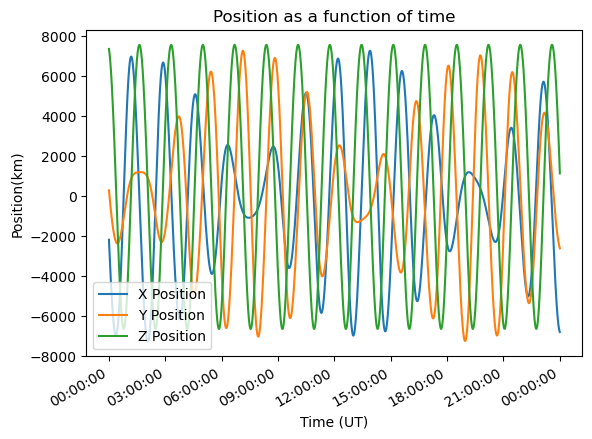

In [19]:
#plotting x_position as a function of time 
plt.plot(GEO_df["UT"], GEO_df["position_x(km)"], label="X Position")          

#plotting y_position as a function of time 
plt.plot(GEO_df["UT"], GEO_df["position_y(km)"], label="Y Position")          

#plotting z_position as a function of time 
plt.plot(GEO_df["UT"], GEO_df["position_z(km)"], label="Z Position")          

#autoformatting the date on x axis
plt.gcf().autofmt_xdate()                                                   
#the format in which the dates will be displayed
myfmt = mdates.DateFormatter("%H:%M:%S")                                    
#setting the format on plot
plt.gca().xaxis.set_major_formatter(myfmt)                                  


#title of plot
plt.title("Position as a function of time")                                   
#label of x-axis
plt.xlabel("Time (UT)")                                               
#label of y-axis
plt.ylabel("Position(km)")                                                  
#displaying legend on plot
plt.legend()                                                                
                                                              

#display the plot on screen
plt.show()                                                                  

<a id="working-with-cassiope-ephemeris-text-files"></a>

#### <ins>Working with CASSIOPE Ephemeris text files</ins>

For this illustration we would be using the *CAS_ephemeris\*.txt* file to plot the lat/lon/alt as a function of time and plot the yaw/pitch/roll as a function of time, indicating when the solution is not from a star tracker. 

Following are the required steps:

**NOTE:** Here, we are using the file from __[2017/02/01](https://epop-data.phys.ucalgary.ca/2017/02/01/CAS_ephemeris_20170201T000000_20170201T235959_1.2.0.txt)__ but the process would be the same for any other file. 

1. Reading the text files

&emsp; **NOTE:** For better reading of the files to a dataframe we convert one of the column names such that it does not contain any spaces and then convert the datatype of the datetime column from integer to datetime. 

In [30]:
import pandas as pd         #to work with dataframes                         
from io import StringIO     #to perform string operations 
import datetime as dt       #to convert integer to datetime 

#opening .txt file in read ("r") format 
with open("CAS_ephemeris_20170201T000000_20170201T235959_1.2.0.txt", "r",
           encoding="utf-8") as file:
    
    #reading the file 
    raw_data = file.read()                                                  

#following line would replace one column name to a 
#string which does not contain any spaces
raw_data = raw_data.replace("attAccuracy(0=Dropout,1=Rough,2=Coarse,3=Moderate,4=Fine,9=No data Available)", 
                            "attAccuracy(0=Dropout,1=Rough,2=Coarse,3=Moderate,4=Fine,9=No_data_Available)")

#reading the text file with the whitespace as delimimter
eph_df = pd.read_csv(StringIO(raw_data), skiprows=1, header="infer",
                  delim_whitespace=True, encoding="utf-8")                  

print(eph_df.head())                                                           

#the following block would convert datetime column from integer to datetime objects
eph_df["HMS(UTC)"] = eph_df["HMS(UTC)"].astype(str)
eph_df["HMS(UTC)"]= eph_df["HMS(UTC)"].str.zfill(6)
eph_df["HMS(UTC)"] = [dt.datetime.strptime(str(x), "%H%M%S")
                   for x in eph_df["HMS(UTC)"]]

eph_df.sort_values(by="HMS(UTC)", inplace=True)


   YMD(UTC)  HMS(UTC)   XGEI(km)   YGEI(km)   ZGEI(km)  VXGEI(km/s)  \
0  20170201         0  1219.6581 -1833.0434  7366.9346       6.2499   
1  20170201         1  1225.9074 -1835.5908  7365.2928       6.2488   
2  20170201         2  1232.1556 -1838.1365  7363.6446       6.2477   
3  20170201         3  1238.4028 -1840.6807  7361.9899       6.2466   
4  20170201         4  1244.6489 -1843.2232  7360.3288       6.2456   

   VYGEI(km/s)  VZGEI(km/s)  XGSM(km)   YGSM(km)  ...  geolon(deg)  \
0      -2.5482      -1.6386 -109.5120 -1730.6127  ...      172.203   
1      -2.5466      -1.6450 -103.1043 -1728.0119  ...      172.299   
2      -2.5450      -1.6515  -96.6966 -1725.4097  ...      172.393   
3      -2.5434      -1.6579  -90.2888 -1722.8059  ...      172.488   
4      -2.5417      -1.6644  -83.8809 -1720.2006  ...      172.581   

   altitude(km)  maglat(deg)  maglon(deg)  mlt(h)  yaw(deg)  pitch(deg)  \
0       1330.42       67.650     -137.200    9.58     0.139       0.359   
1 

<a id="plotting-latitude-longitude-altitude-as-functions-of-time"></a>

#### Plotting Latitude, Longitude, Altitude as functions of time

Now, that the information is stored in a dataframe, it could be easily used to plot using *matplotlib*

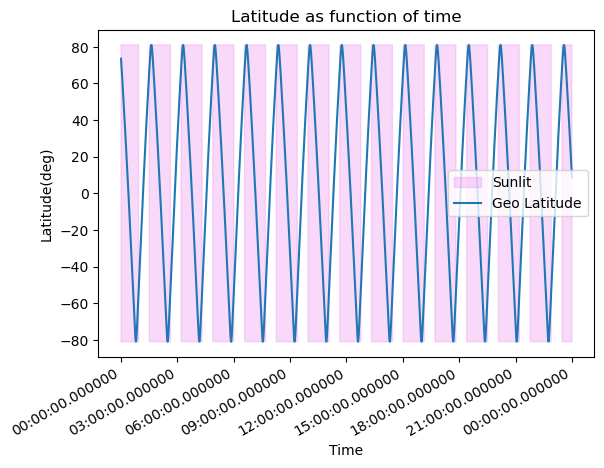

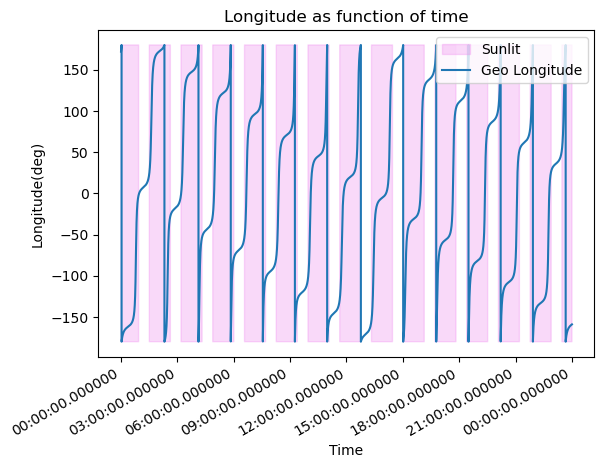

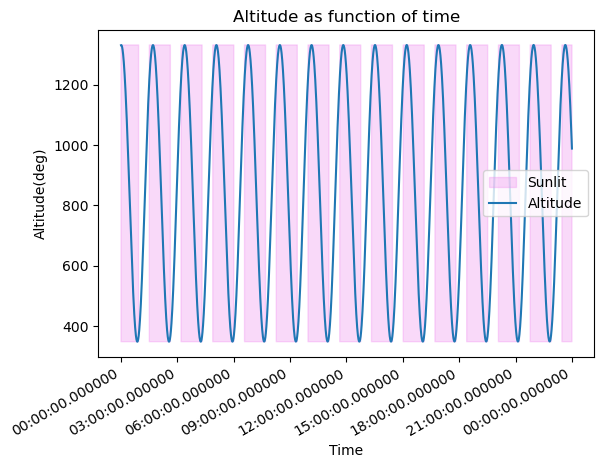

In [31]:
import matplotlib.pyplot as plt     #to plot the graphs 
import matplotlib.dates as mdates   #to format the on plot

#shading the region which is sunlit
plt.fill_between(eph_df["HMS(UTC)"], min(eph_df["geolat(deg)"]), 
                 max(eph_df["geolat(deg)"]),
                 where=(eph_df["eclipse"]=="Sunlit"),
                 alpha=0.3, label="Sunlit", color="violet")

# Plotting latitude as a function of time
plt.plot(eph_df["HMS(UTC)"], eph_df["geolat(deg)"], label="Geo Latitude")

#autoformatting the date on x axis
plt.gcf().autofmt_xdate()                                       
#the format in which the dates will be displayed
myfmt = mdates.DateFormatter("%H:%M:%S.%f")                     
#setting the format on plot
plt.gca().xaxis.set_major_formatter(myfmt)                      

#title of plot
plt.title("Latitude as function of time")                       
#label of x- axis
plt.xlabel("Time")                                              
#label of y axis
plt.ylabel("Latitude(deg)")                                     

plt.legend()
#displaying plot on screen
plt.show()                                                      


#shading the region which is sunlit
plt.fill_between(eph_df["HMS(UTC)"], min(eph_df["geolon(deg)"]), 
                 max(eph_df["geolon(deg)"]),
                 where=(eph_df["eclipse"]=="Sunlit"),
                 alpha=0.3, label="Sunlit", color="violet")
#plotting longitude as function of time 
plt.plot(eph_df["HMS(UTC)"], eph_df["geolon(deg)"], label="Geo Longitude")                     

#autoformatting the date on x axis
plt.gcf().autofmt_xdate()                                       
#the format in which the dates will be displayed
myfmt = mdates.DateFormatter("%H:%M:%S.%f")                     
#setting the format on plot
plt.gca().xaxis.set_major_formatter(myfmt)                      

#title of plot
plt.title("Longitude as function of time")                      
#label of x- axis
plt.xlabel("Time")                                              
#label of y axis
plt.ylabel("Longitude(deg)")                                    

plt.legend()
#displaying plot on screen
plt.show()                                                      


#shading the region which is sunlit
plt.fill_between(eph_df["HMS(UTC)"], min(eph_df["altitude(km)"]), 
                 max(eph_df["altitude(km)"]),
                 where=(eph_df["eclipse"]=="Sunlit"),
                 alpha=0.3, label="Sunlit", color="violet")
#plotting altitude as function of time 
plt.plot(eph_df["HMS(UTC)"], eph_df["altitude(km)"], label="Altitude")                    

#autoformatting the date on x axis
plt.gcf().autofmt_xdate()                                       
#the format in which the dates will be displayed
myfmt = mdates.DateFormatter("%H:%M:%S.%f")                     
#setting the format on plot
plt.gca().xaxis.set_major_formatter(myfmt)                      

#title of plot
plt.title("Altitude as function of time")                       
#label of x- axis
plt.xlabel("Time")                                              
#label of y axis
plt.ylabel("Altitude(deg)")                                                                                          

plt.legend()
#displaying plot
plt.show()                                                      

<a id="plotting-ypr-as-function-of-time"></a>

#### Plotting YPR as function of time

For this plot we will have to indicate when the solution is not from a star tracker, this could be done using *matplotlib*'s *fill_between* function. And following the documentation whenever *Attitude Accuracy* is less than 4, the solution is a result of a long interpolation between two star sensors, or worse.. 

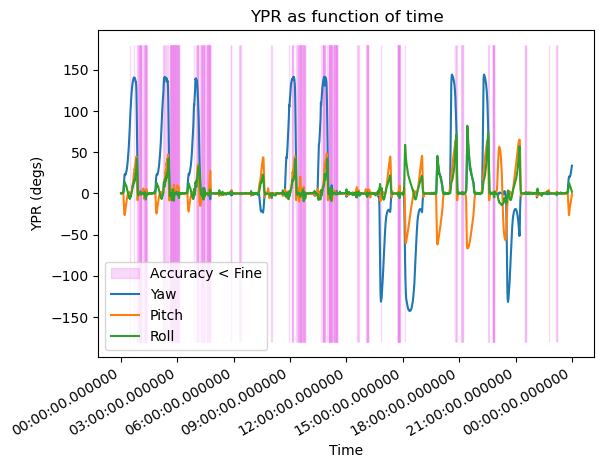

In [32]:
#shading the regions where attitude accuracy is less than 4
plt.fill_between(eph_df["HMS(UTC)"], -180, 180,
                 where=(eph_df["attAccuracy(0=Dropout,1=Rough,2=Coarse,3=Moderate,4=Fine,9=No_data_Available)"] < 4),
                 alpha=0.3, label="Accuracy < Fine", color="violet")


#plotting the yaw,pitch,roll as function of time  
plt.plot(eph_df["HMS(UTC)"], eph_df["yaw(deg)"], label="Yaw")
plt.plot(eph_df["HMS(UTC)"], eph_df["pitch(deg)"], label="Pitch")
plt.plot(eph_df["HMS(UTC)"], eph_df["roll(deg)"], label="Roll")


#autoformatting the date on x axis
plt.gcf().autofmt_xdate()                                       
#the format in which the dates will be displayed
myfmt = mdates.DateFormatter("%H:%M:%S.%f")                     
#setting the format on plot
plt.gca().xaxis.set_major_formatter(myfmt)                      

#title of plot
plt.title("YPR as function of time")                            
#label of x-axis
plt.xlabel("Time")                                              
#label of y-axis
plt.ylabel("YPR (degs)")                                        
#displaying legend on plot
plt.legend()                                                                                                      

#displaying the plot on screen
plt.show()                                                      

<a id="working-with-cassiope-attitude-quaternion-cdf-file"></a>

#### <ins>Working with CASSIOPE Attitude-Quaternion cdf file</ins>

For this illustration, we have two goals first to plot the quaternions as functions of time, indicating when the attitude solution is degraded and second, plot the yaw, pitch, roll as functions of time, indicating when the attitude solution is degraded.

**NOTE:** Here, we are using the file from __[2017/02/01](https://epop-data.phys.ucalgary.ca/2017/02/01/CAS_AttQuat_20170201T000000_20170201T235959_1.3.0.cdf.zip)__ but the process would be the same for any other file.



1. Reading *.cdf* files

To read the *.cdf* file we would use *cdflib* package and first display all the attributes within the file 

In [33]:
import cdflib as cdf                #to work with cdf files
import matplotlib.pyplot as plt     #to plot data
import matplotlib.dates as mdates   #to format x axis 
import pandas as pd                 #to work with dataframes

#reading the cdf file 
cdf_file = cdf.CDF("CAS_AttQuat_20170201T000000_20170201T235959_1.3.0.cdf")

#printing global attributes 
print(cdf_file.globalattsget())

print("\n")

#printing the information of the cdf file 
print(cdf_file.cdf_info())


{'TITLE': ['Cassiope (Swarm-E) Definitive Attitude'], 'File_naming_convention': ['CAS_AttQuat_YYYYmmddTHHMMSS_YYYYmmddTHHMMSS_M.M.R.cdf'], 'Logical_file_id': ['cassiope_attitude_v1.3.0'], 'Logical_source': ['CASSIOPE'], 'Logical_source_description': ['CASSIOPE enhanced polar outflow probe'], 'Data_version': ['1.3.0'], 'Data_type': ['K0>Survey Data'], 'PI_name': ['A.Yau'], 'PI_affiliation': ['UofC'], 'TEXT': ['https://epop.phys.ucalgary.ca/cassiope/'], 'Discipline': ['Space Physics>Ionospheric Science'], 'Mission_group': ['CASSIOPE'], 'Project': ['CASSIOPE'], 'Source_name': ['CASSIOPE'], 'Descriptor': ['CASSIOPE>Cascade, Smallsat and Ionospheric Polar Explorer'], 'Instrument_type': ['Magnetic Fields (space)', 'Particles (space)', 'Plasma and Solar Wind', 'Radio and Plasma Waves (space)', 'Imagers (space)']}


CDFInfo(CDF=WindowsPath('D:/comm_soft_tools/python_codes/tutorials/ephemeris_tutorial/CAS_AttQuat_20170201T000000_20170201T235959_1.3.0.cdf'), Version='3.7.0', Encoding=6, Majority

Converting the required data to a dataframe 

As can be seen from the output of the above block of code that we require only information from the attributes "timestamps", "q", "q_labels", "Data_Source_previous", "yaw", "pitch" and "roll". And we will require to convert the value from "timestamps" column to UTC format.

In [34]:
q = cdf_file.varget("q")
timestamps = cdf_file.varget("Timestamp")
data_source_previous = cdf_file.varget("Data_Source_previous")

yaw = cdf_file.varget("Yaw")
pitch = cdf_file.varget("Pitch")
roll = cdf_file.varget("Roll")

#converting quaternion vectors to individual objects 
q_vec1 = [x for x,_,_,_ in q]
q_vec2 = [x for _,x,_,_ in q]
q_vec3 = [x for _,_,x,_ in q]
q_scal = [x for _,_,_,x in q]


#converting timestamp values to UTC
timestamps = [cdf.cdfepoch.to_datetime(x) for x in timestamps]
#as the to_datetime would return a list of lists with individual timestamps
#in the following line we are flattening the list 
timestamps = [x[0] for x in timestamps]

#Attitude and quaternions dictionary
Att_Quat_dict = {"timestamps":timestamps,
               "q_vec1":q_vec1,
               "q_vec2":q_vec2,
               "q_vec3":q_vec3,
               "q_scal":q_scal,
               "yaw":yaw,
               "pitch":pitch,
               "roll":roll,
               "data_source":data_source_previous}

#converting dictionary to dataframe 
Att_Quat_df = pd.DataFrame(Att_Quat_dict)

print(Att_Quat_df.head())

           timestamps    q_vec1    q_vec2    q_vec3    q_scal       yaw  \
0 2017-02-01 00:00:00  0.217410 -0.965641  0.052478  0.132352  0.138945   
1 2017-02-01 00:00:01  0.217489 -0.965575  0.052391  0.132737  0.128005   
2 2017-02-01 00:00:02  0.217569 -0.965508  0.052304  0.133123  0.117065   
3 2017-02-01 00:00:03  0.217648 -0.965442  0.052217  0.133509  0.106126   
4 2017-02-01 00:00:04  0.217677 -0.965389  0.052103  0.133886  0.101513   

      pitch      roll  data_source  
0  0.359426  0.147148            5  
1  0.364178  0.145421            5  
2  0.368930  0.143694            5  
3  0.373682  0.141967            5  
4  0.379210  0.137807            4  


<a id="plotting-quaternions-as-a-function-of-time"></a>

#### Plotting Quaternions as a function of time 

The following code shows how to plot all the quaternions as a function of time. Also, we use any value less than 3 to indicate that the solution is degraded. Quaternions range from -1 to 1 and that is represented in the *fil_between* argument. 

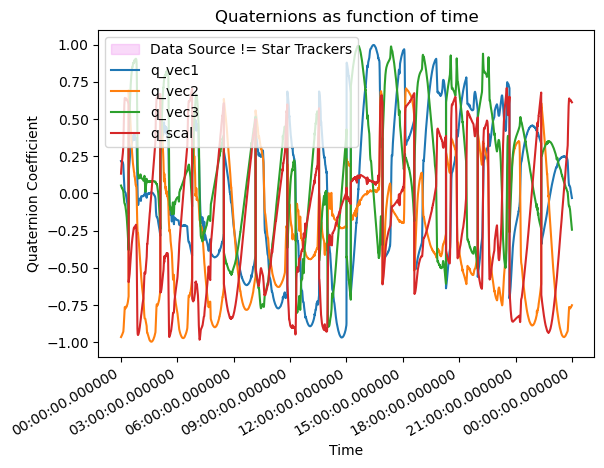

In [35]:
#shading the regions where data source solutions are degraded or are less than 3 
plt.fill_between(Att_Quat_df["timestamps"], -1, 1,
                 where=(Att_Quat_df["data_source"] < 3), interpolate=True,
                 alpha=0.3, label="Data Source != Star Trackers", color="violet")

#plotting quaternions as function of time 
plt.plot(Att_Quat_df["timestamps"], Att_Quat_df["q_vec1"], label="q_vec1")
plt.plot(Att_Quat_df["timestamps"], Att_Quat_df["q_vec2"], label="q_vec2")
plt.plot(Att_Quat_df["timestamps"], Att_Quat_df["q_vec3"], label="q_vec3")
plt.plot(Att_Quat_df["timestamps"], Att_Quat_df["q_scal"], label="q_scal")

#formatting timestamp values on x-axis
plt.gcf().autofmt_xdate()                                       

#the format in which the dates will be displayed
myfmt = mdates.DateFormatter("%H:%M:%S.%f")                     

#setting the format on plot
plt.gca().xaxis.set_major_formatter(myfmt)                      

plt.legend()
#title of plot
plt.title("Quaternions as function of time")                            
#label of x-axis
plt.xlabel("Time")                                              
#label of y-axis
plt.ylabel("Quaternion Coefficient") 

plt.show()

<a id="plotting-yaw-pitch-roll-as-function-of-time"></a>

#### Plotting Yaw, Pitch, Roll as function of time

For this we would repeat the same process as before but for yaw/pitch/roll values and the only change necessary would be to update the range of the shaded plot with -180 to 180. 

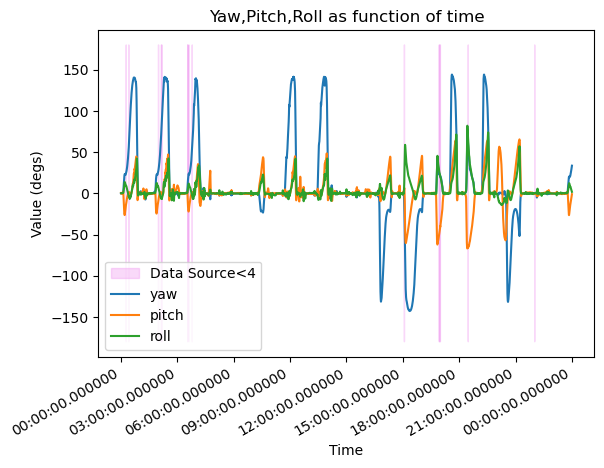

In [36]:
#shading the regions where data source solutions are degraded or are less than 4 
plt.fill_between(Att_Quat_df["timestamps"], -180, 180,
                 where=(Att_Quat_df["data_source"] < 4), interpolate=True,
                 alpha=0.3, label="Data Source<4", color="violet")

#plotting quaternions as function of time 
plt.plot(Att_Quat_df["timestamps"], Att_Quat_df["yaw"], label="yaw")
plt.plot(Att_Quat_df["timestamps"], Att_Quat_df["pitch"], label="pitch")
plt.plot(Att_Quat_df["timestamps"], Att_Quat_df["roll"], label="roll")

#formatting timestamp values on x-axis
plt.gcf().autofmt_xdate()                                       
#the format in which the dates will be displayed
myfmt = mdates.DateFormatter("%H:%M:%S.%f")                     
#setting the format on plot
plt.gca().xaxis.set_major_formatter(myfmt)                      

plt.legend()
#title of plot
plt.title("Yaw,Pitch,Roll as function of time")                            
#label of x-axis
plt.xlabel("Time")                                              
#label of y-axis
plt.ylabel("Value (degs)") 

plt.show()